In [4]:
import numpy as np
import os
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

Load train & test files

In [9]:
files_train = 0
files_validation = 0
cwd = os.getcwd()
folder = 'train_data/train'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_train +=len(files)
    
folder = 'train_data/test'

for sub_folder in os.listdir(folder):
    path, dirs, files = next(os.walk(os.path.join(folder, sub_folder)))
    files_validation +=len(files)

print(files_train, files_validation)

432 164


Set key parameters

In [13]:
img_width, img_height = 48, 48
train_data_dir = 'train_data/train'
validation_data_dir = 'train_data/test'
nb_train_sample = files_train
nb_validation_sample = files_validation
batch_size = 32
epochs = 15
num_classes = 2

Build model on top of a pretrained VGG

In [18]:
model = applications.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_width, img_height, 3))

In [26]:
model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [28]:
for layer in model.layers[:10]:
    layer.traiable = False

In [36]:
x = model.output
x = Flatten()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)
model_final = Model(inputs = model.input, outputs = predictions)
model_final.compile(loss = 'categorical_crossentropy', 
                    optimizer = optimizers.SGD(learning_rate = 0.0001, momentum=0.9), 
                    metrics=['accuracy'])

Data Augmentation

In [39]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest', zoom_range=0.1,
                  width_shift_range=0.1, height_shift_range=0.1,
                  rotation_range=5)

test_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, 
                   fill_mode='nearest', zoom_range=0.1,
                  width_shift_range=0.1, height_shift_range=0.1,
                  rotation_range=5)

train_generator = train_datagen.flow_from_directory(train_data_dir, 
                                  target_size=(img_height, img_width),
                                 batch_size=batch_size, 
                                  class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation_data_dir, 
                                  target_size=(img_height, img_width),
                                 batch_size=batch_size, 
                                  class_mode='categorical')

Found 432 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [47]:
history = model_final.fit(
train_generator, steps_per_epoch=nb_train_sample//batch_size, 
    validation_steps=nb_validation_sample//batch_size, 
epochs = epochs, validation_data=validation_generator)

Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9801 - loss: 0.0625 - val_accuracy: 0.9375 - val_loss: 0.1568
Epoch 2/15
 1/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 1.0000 - loss: 0.0483

F:\Anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 0.0483 - val_accuracy: 0.7500 - val_loss: 0.6642
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9827 - loss: 0.0719 - val_accuracy: 0.9187 - val_loss: 0.1752
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0361 - val_accuracy: 1.0000 - val_loss: 0.1751
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.9672 - loss: 0.0995 - val_accuracy: 0.9375 - val_loss: 0.1678
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 1.0000 - val_loss: 0.0281
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9875 - loss: 0.0630 - val_accuracy: 0.9375 - val_loss: 0.1679
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 1.0000 - val_loss: 8.5155e-04
Epoch 9/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.9954 - loss: 0.0463 - val_accuracy: 0.9187 - val_loss: 0.

In [49]:
history.history

{'accuracy': [0.9725000262260437,
  1.0,
  0.9800000190734863,
  1.0,
  0.9807692170143127,
  1.0,
  0.9850000143051147,
  1.0,
  0.9900000095367432,
  1.0,
  0.9850000143051147,
  0.96875,
  0.9775000214576721,
  1.0,
  0.9825000166893005],
 'loss': [0.07338187098503113,
  0.04828491061925888,
  0.07505983114242554,
  0.036090604960918427,
  0.06783910095691681,
  0.014242010191082954,
  0.05646353214979172,
  0.026193615049123764,
  0.045264169573783875,
  0.05253128334879875,
  0.04882211610674858,
  0.0717417299747467,
  0.05608589947223663,
  0.023537345230579376,
  0.042407017201185226],
 'val_accuracy': [0.9375,
  0.75,
  0.918749988079071,
  1.0,
  0.9375,
  1.0,
  0.9375,
  1.0,
  0.918749988079071,
  1.0,
  0.9375,
  1.0,
  0.925000011920929,
  1.0,
  0.9624999761581421],
 'val_loss': [0.15675760805606842,
  0.6641830801963806,
  0.1751949042081833,
  0.17509901523590088,
  0.16784198582172394,
  0.028093967586755753,
  0.16785140335559845,
  0.0008515497320331633,
  0.162884

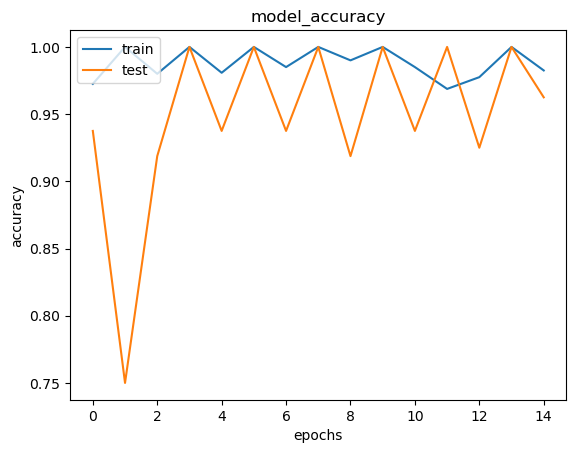

In [51]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

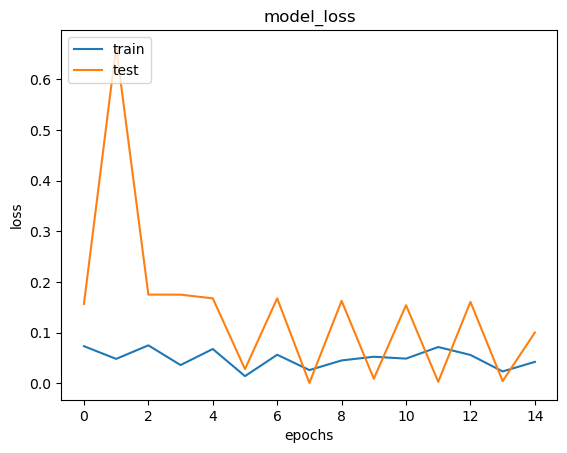

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
model_final.save('model_final.h5')

In [55]:
class_dictionary = {}
class_dictionary[0] = 'no_car'
class_dictionary[1] = 'car'

In [57]:
class_dictionary

{0: 'no_car', 1: 'car'}

Predictive System

In [88]:
import cv2
import numpy as np
def make_prediction(image):
    image = cv2.imread(image)
    image = cv2.resize(image, (48, 48))
    img = image/255
    img = np.expand_dims(img, axis = 0)
    class_predicted = model_final.predict(img)
    intId = np.argmax(class_predicted[0])
    label = class_dictionary[intId]
    return label

In [90]:
make_prediction("roi_1.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


'car'

In [92]:
make_prediction("spot1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


'no_car'

In [94]:
model_final.save("model_final.h5")